# **Reporte Final - Proyecto Flight on time**

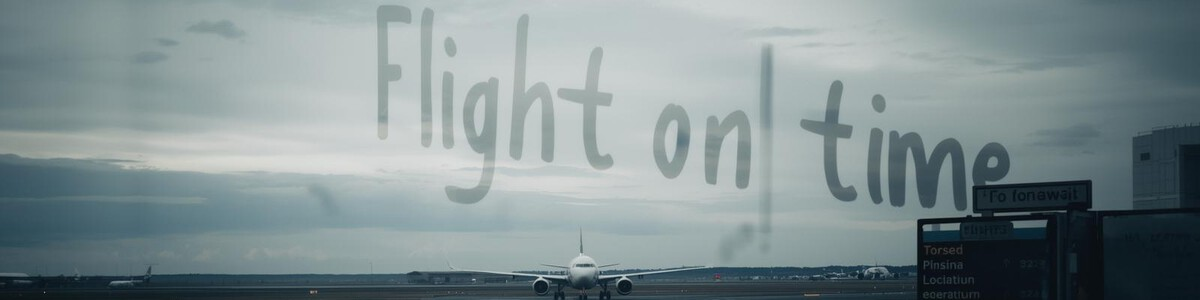

---


## **Alura LATAM**


### **Integrantes:**
- **Aynara Elena Bendaña Ampie**
- **Brayan Emanuel Hernández Cruz**

---

## **1. Introducción**

En este Notebook presentamos el Reporte Final del proyecto de predicción de retrasos en vuelos. El objetivo de este documento es guiar al lector a través de todo el ciclo de vida de ciencia de datos, desde el entendimiento de los datos hasta la puesta en marcha de nuestro servicio predictivo.


*Para ver el indice dirijase a la tabla de contenidos ubicada en la parte izquierda* 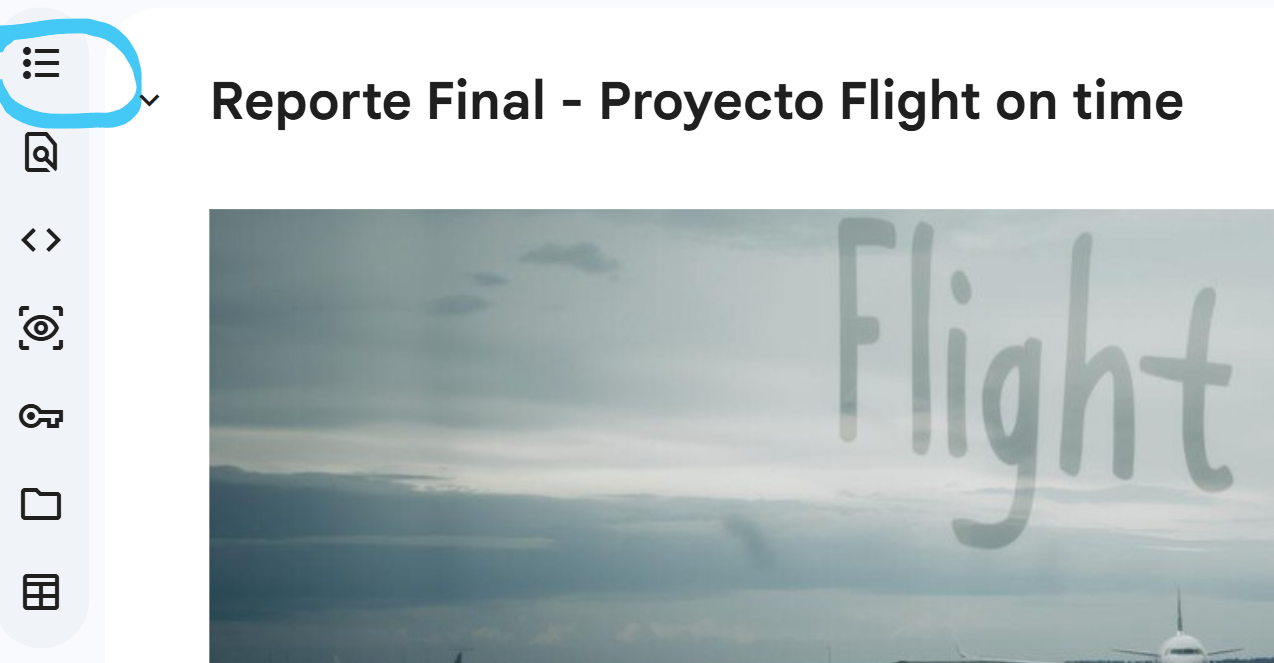


---

## **2. Objetivo del Proyecto**

Todos los que viajan en avión —y especialmente las aerolíneas y aeropuertos— sufren con retrasos.

Estos retrasos causan insatisfacción en los pasajeros, costos extras para las empresas y problemas de logística (como conexiones perdidas y reajustes de vuelos).

El cliente quiere predecir, basándose en datos del vuelo (origen, destino, hora, aerolínea, etc.), cuál es la probabilidad de que el vuelo se retrase para prepararse con antelación, por lo cual creamos un modelo de machine learning para proporcionar una prediccion

"Desarrollar un modelo de clasificación capaz de predecir si un vuelo sufrirá un retraso significativo basándose en variables temporales y logísticas. Buscamos comparar la precisión de algoritmos como Regresión Logística, Árboles de Decisión y XGBoost para determinar cuál ofrece el mejor rendimiento en un entorno de producción."

---

## **3. Descripción del dataset**


**Los datasets fueron sacados de Kaggle:**

---
1. [2015 Flight Delays and Cancellations](https://www.kaggle.com/datasets/usdot/flight-delays/data?select=flights.csv)
* **Dimensiones:** 5819079 registros y 31 columnas
---
2.  [Flight delays](https://www.kaggle.com/datasets/rgjanane/flight-delays)
* **Dimensiones:** 5819079 registros y 19 columnas
---


*Para este análisis, utilizamos un dataset masivo que contiene el historial de vuelos, aerolíneas y tiempos de demora. A continuación, se presenta una muestra de la estructura de los datos originales.*



### 3.1 Datasets Originales VS. Dataset Final

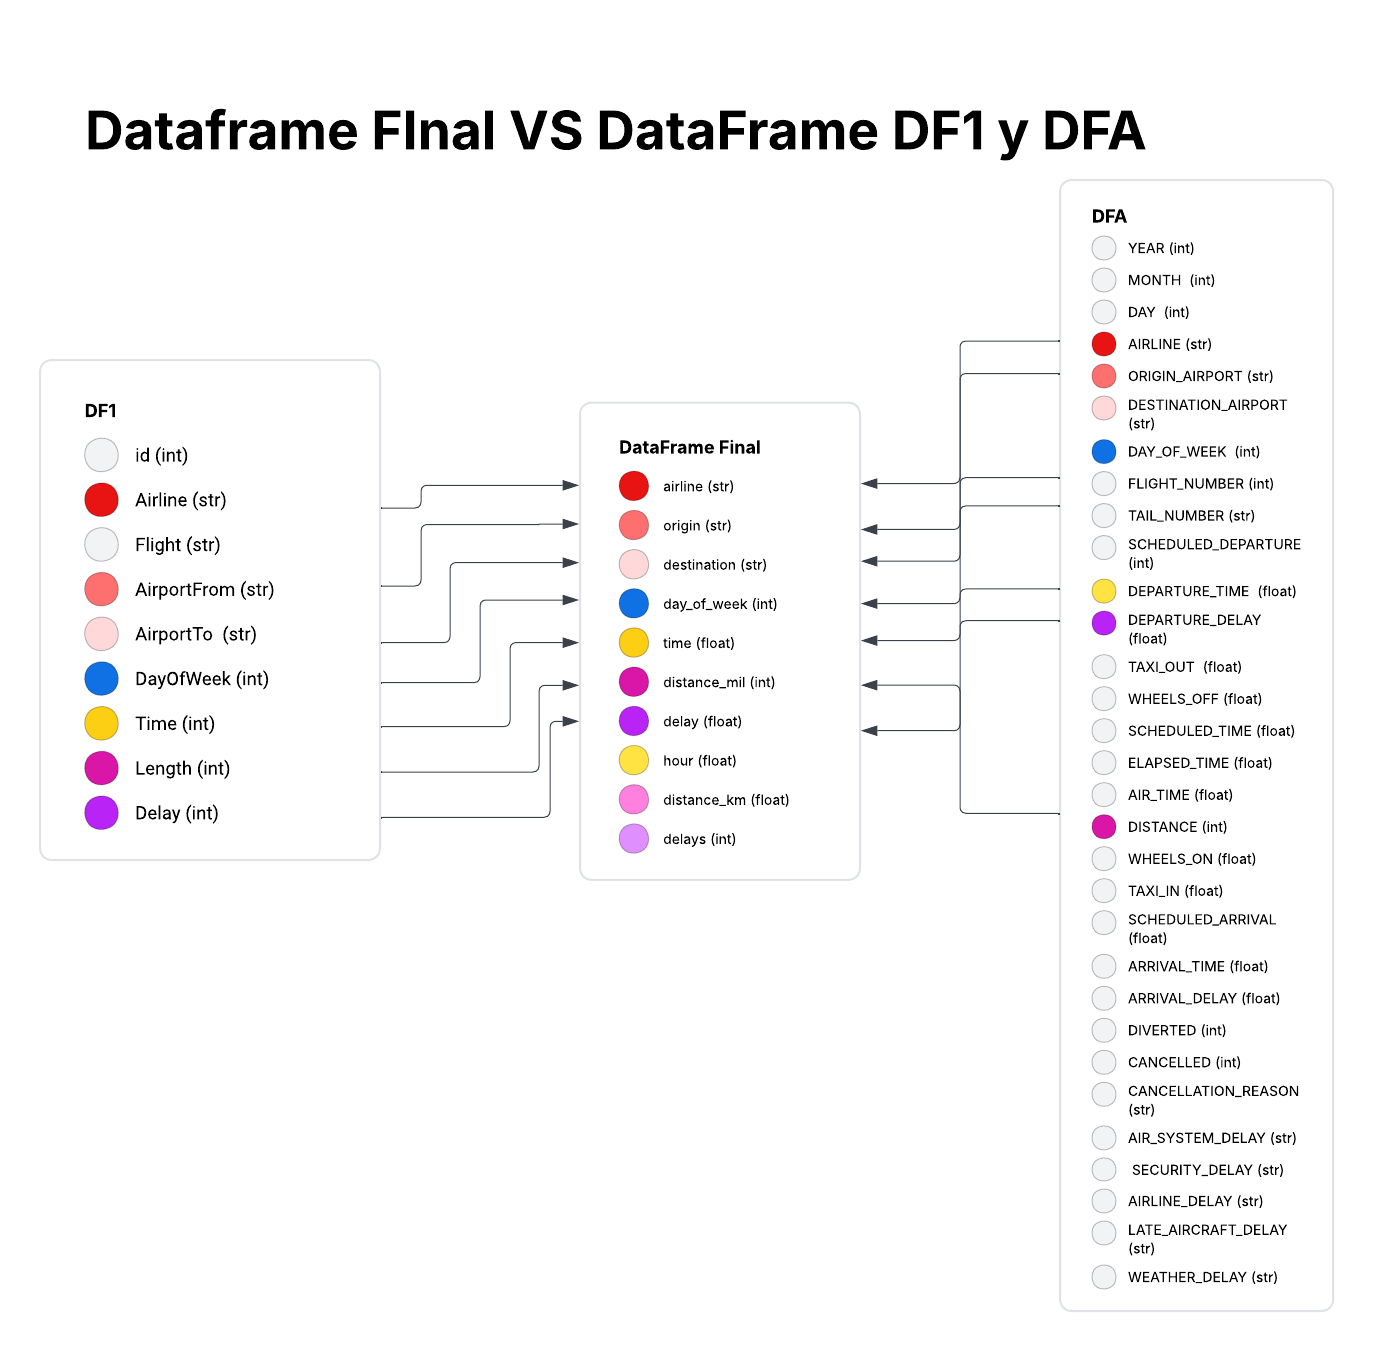

### 3.2 Notebook de la ETL y EDA
[Flight Analysis Notebook](https://colab.research.google.com/drive/1suPXyRr3C-G80hoAO6hKP_ii92flkYmA?usp=sharing)

---
*Nota: En este cuaderno se realizo la limpieza y el analisis inicial de los datos (por cuestiones del tamaño del dataset tuvimos que exportar los datos a otros Noteboks para hacer el modelado de machine learning*


---

 ## **4. (EDA) Analísis exploratorio de datos**

*En esta fase, analizamos el comportamiento de los vuelos y su relación con los retrasos para identificar patrones clave antes del entrenamiento de los modelos.*

###4.1. Equilibrio de la Variable Objetivo
Iniciamos observando la distribución de los vuelos según su estado de puntualidad.

* **Resultados:** Contamos con un dataset robusto de más de 6 millones de registros. Se observa que aproximadamente 3.9 millones de vuelos fueron puntuales (0) frente a 2.3 millones con retraso (1).

* **Conclusión:** Aunque existe un desbalanceo hacia los vuelos puntuales, la clase minoritaria ("Retrasado") tiene una representación suficiente (aprox. 37.7%) para que los modelos de Machine Learning aprendan a identificar los patrones de demora sin sesgos críticos.

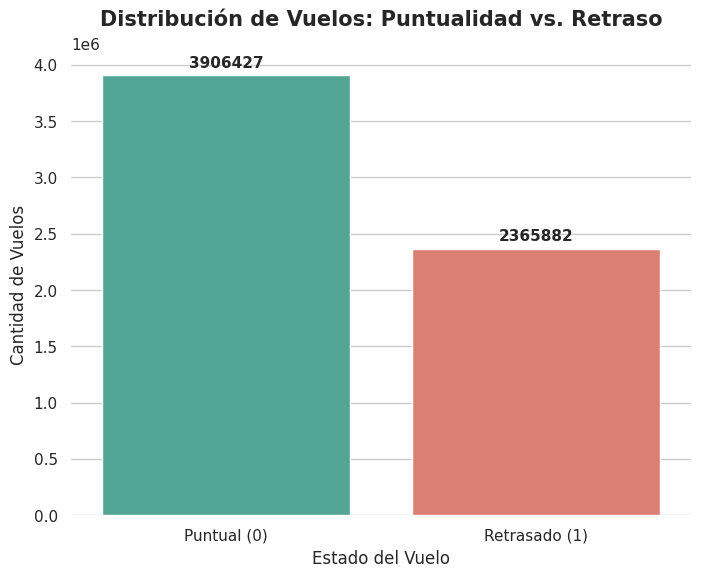

###4.2. Análisis Temporal: El factor "Hora"
A través del gráfico de probabilidad por hora y el diagrama de violín, identificamos que el momento del día es el predictor más influyente.

* **Patrones detectados:** La probabilidad de retraso supera el promedio global (37.72%) en dos franjas críticas: la madrugada (00:00 - 02:00) y el cierre del día (23:00 - 24:00), alcanzando picos de casi el 90% de probabilidad al final del día.

* **Punto de seguridad:** Las 05:00 AM es la hora con menor riesgo de retraso (menos del 20%).

* **Visualización:** El gráfico de violín confirma que los vuelos retrasados (1) tienden a concentrarse en horas más tardías en comparación con los vuelos puntuales.

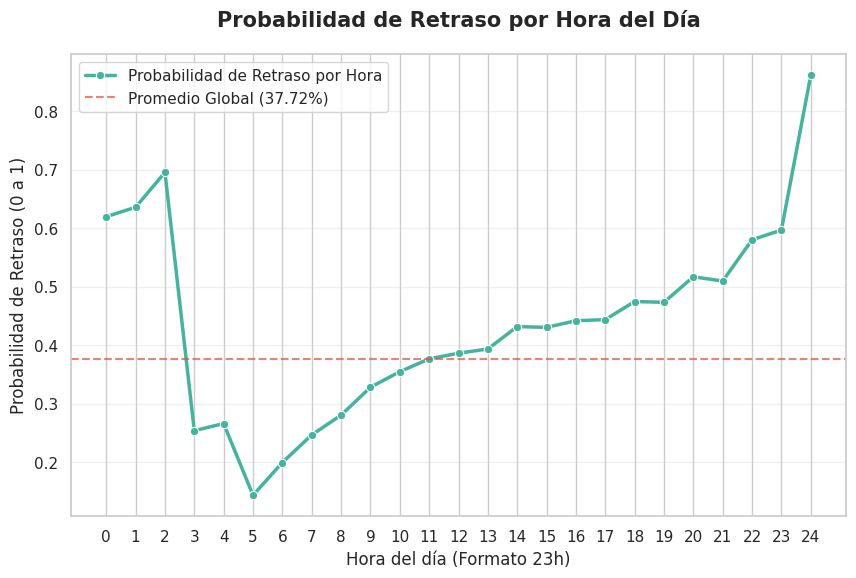

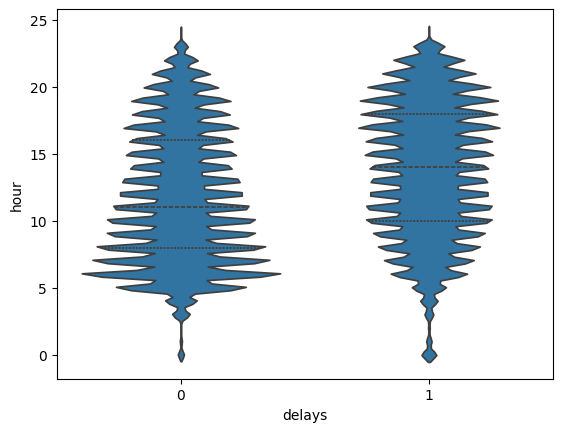

###4.3. Análisis Temporal: Día de la Semana
El análisis de riesgo por día muestra variaciones significativas en la puntualidad.

* **Ranking de Riesgo:** El Jueves se posiciona como el día con mayor probabilidad de retraso ($0.394$), seguido de cerca por el Lunes.

* **Día más seguro:** El Sábado presenta el índice de retrasos más bajo ($0.349$), lo que sugiere una menor saturación del sistema aéreo o una programación más eficiente durante el fin de semana.

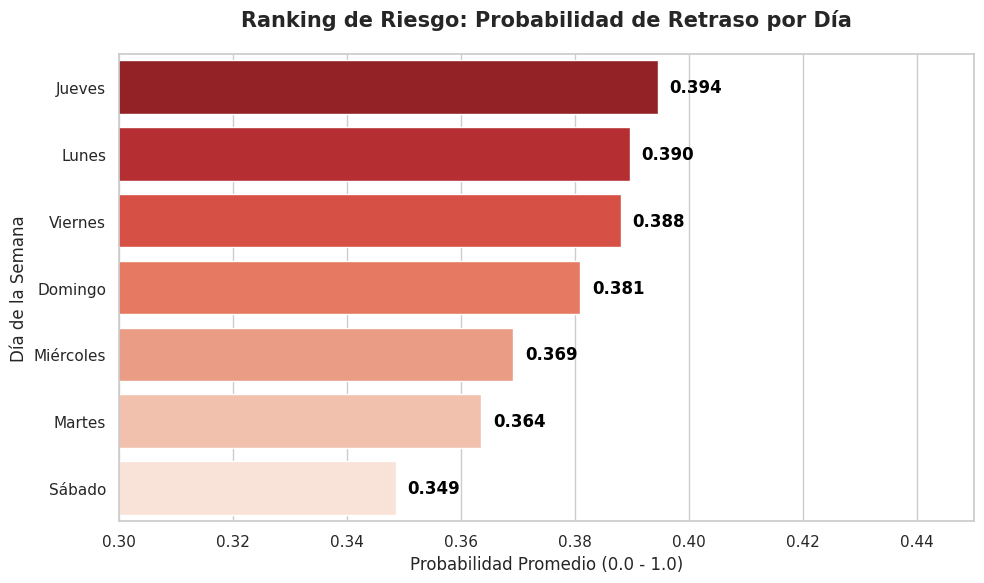

###4.4. Análisis de Correlación
Utilizamos una matriz de correlación para cuantificar la relación lineal entre las variables numéricas y nuestra variable objetivo (delays).
* **Correlación Crítica:** La variable hour presenta la correlación más alta con los retrasos ($r = 0.20$), confirmando nuestro análisis visual previo.
* **Otras variables:** La distancia `distance_km` y el día de la semana muestran correlaciones cercanas a cero ($0.05$ y $-0.01$ respectivamente).
* **Interpretación:** Esto nos indica que, aunque la distancia influye, el factor determinante para predecir un retraso en este dataset es el horario de salida.

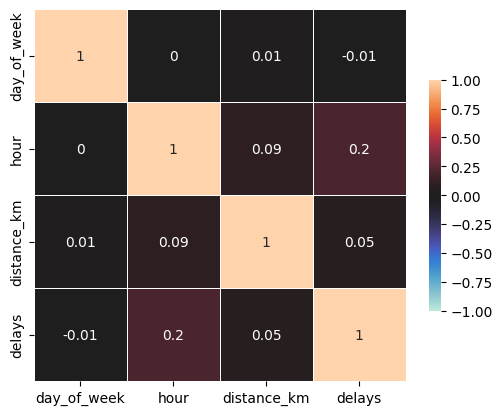

### 4.5. Análisis de Retrasos por Aerolínea
El análisis por operador revela que la elección de la aerolínea es un factor determinante en el riesgo de demora:

* **Aerolíneas críticas:** La compañía **CO** presenta el índice más alto (**56.6%**), seguida de **UA** y **WN**.

* **Variabilidad:** La diferencia entre los operadores del Top 10 indica que la eficiencia operativa varía drásticamente entre empresas, convirtiendo a `airline` en una variable esencial para el modelo.


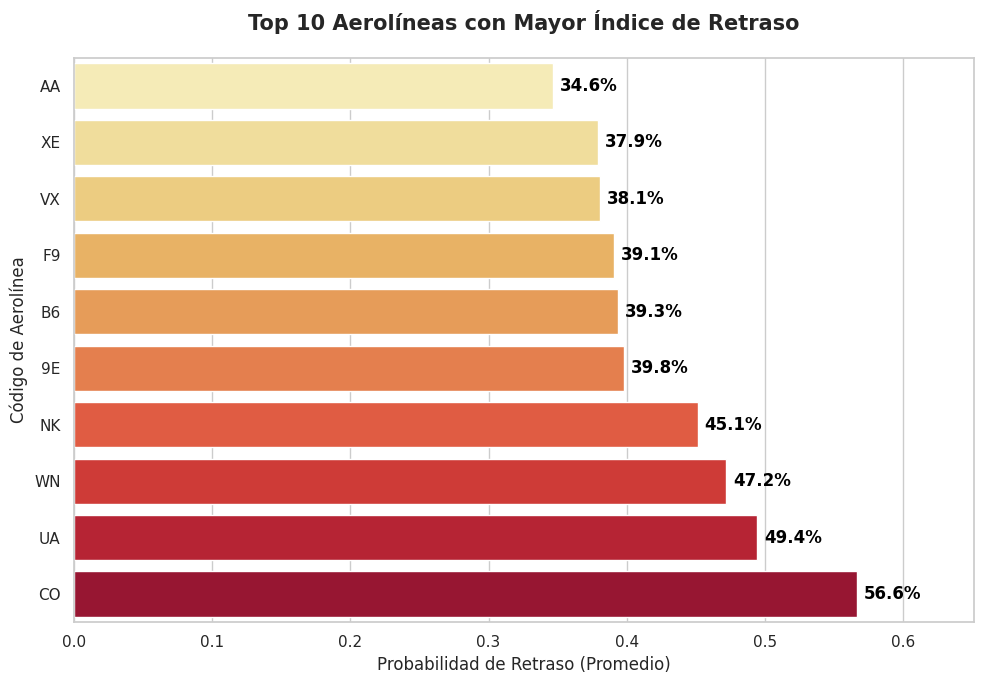

---

## **5. Procesamiento de datos**


###5.1. Selección de Características (Feature Selection)
Basándonos en la matriz de correlación y el análisis de importancia visual, seleccionamos las variables que aportan mayor valor predictivo:

* **Temporales:** `hour` (la variable con mayor correlación) y `day_of_week`.

* **Logísticas:** `airline` (debido a la alta variabilidad de retrasos entre compañías) y `distance_km`.

* **Objetivo:** `delays` (nuestra etiqueta binaria 0 o 1).







###5.2. Tratamiento de Variables Categóricas
Dado que los modelos matemáticos no pueden procesar texto directamente, transformamos las variables cualitativas:

* **Encoding:** Para `airline` (como CO, UA, WN), aplicamos técnicas de codificación numérica (`One-Hot Encoding`) para que el modelo pueda cuantificar el peso de cada aerolínea en la predicción.

###5.3. Escalado y Normalización
Este paso es crítico para asegurar la convergencia de la Regresión Logística:

* **StandardScaler:** Aplicamos una estandarización a las variables numéricas (especialmente `distance_km` y `hour`). Esto ajusta los datos para que tengan una media de 0 y una desviación estándar de 1, evitando que variables con rangos grandes (como la distancia) opaquen a las de rangos pequeños.

Nota: `StandardScaler` solo es utilizado para el modelo de `Logistic Regresion`

###5.4. División del Dataset (Train-Test Split)
Para garantizar una evaluación imparcial y detectar posibles problemas de overfitting (sobreajuste), dividimos los datos:

* **Entrenamiento (80%):** Utilizado para que los algoritmos aprendan los patrones de retraso.

* **Prueba (20%):** Datos "ciegos" para el modelo, utilizados exclusivamente para validar la precisión final y métricas de desempeño.

---

## **6. Modelado**

En esta fase, seleccionamos y entrenamos diversos algoritmos de aprendizaje supervisado para abordar el problema como una clasificación binaria (0: Puntual, 1: Retrasado). El objetivo es encontrar el modelo que logre el mejor equilibrio entre precisión y capacidad de generalización.

###6.1. Modelos Seleccionados

* **Regresión Logística:** Utilizada como nuestro baseline (modelo base). Es un modelo lineal que estima la probabilidad de pertenencia a una clase mediante la función sigmoide:$$P(y=1) = \frac{1}{1 + e^{-z}}$$

* **Árbol de Decisión:** Un modelo no lineal que descompone los datos en reglas lógicas de decisión. Lo incluimos por su alta interpretabilidad, permitiéndonos visualizar qué variables (como la hora o la aerolínea) disparan un retraso.

* **Random Forest:** Un ensamble de múltiples árboles de decisión (Bagging). Lo elegimos para reducir la varianza y evitar el sobreajuste (overfitting) que suelen tener los árboles individuales, mejorando la robustez de la predicción.

* **XGBoost (Extreme Gradient Boosting):** Implementamos este algoritmo de última generación que utiliza Gradient Boosting. Es conocido por su alta eficiencia y precisión en grandes volúmenes de datos, como los millones de registros de este dataset.

* **CatBoost (Categorical Boosting):**  La adición más avanzada a nuestro pipeline. A diferencia de otros modelos, CatBoost implementa una técnica de Boosting Simétrico y maneja de forma nativa las variables categóricas (como `airline`), minimizando la necesidad de preprocesamiento manual y reduciendo drásticamente el riesgo de overfitting.

###6.2. Estrategia de Entrenamiento
El proceso de entrenamiento se llevó a cabo siguiendo estos lineamientos técnicos:

1. **Carga de Hiperparámetros:** Configuramos los modelos utilizando la librería scikit-learn y, en el caso de XGBoost, su librería específica.

2. **Ajuste del Modelo (.fit):** Los algoritmos procesaron el set de entrenamiento ($X\_train$ escalado y $y\_train$) para ajustar sus pesos y parámetros internos.

3. **Validación:** Se monitoreó el desempeño para asegurar que el modelo no solo memorizara los datos, sino que aprendiera patrones reales.

4. **Serialización:** Una vez entrenados, los modelos se guardaron utilizando joblib o el formato nativo del modelo (como .pkl) para ser consumidos por el servicio de FastAPI.

###6.3. Justificación Técnica
La elección de una variedad de modelos nos permite contrastar resultados:

* Buscamos si una relación simple (Lineal/Logística) es suficiente o si la complejidad de los datos de vuelo requiere capturar interacciones no lineales (Árboles/XGBoost).

* Priorizamos modelos que manejen bien el volumen de datos (6 millones de registros), donde XGBoost destaca por su velocidad de procesamiento.

---

## **7. Evaluación del modelo**

### **7.1. ¿Cómo evaluamos los modelos?**

Los modelos fueron evaluados en distintas métricas pero para nuestro caso, nos enfocamos más en darle un peso correcto al **recall**, con un proposito especifico y es que, es de **mayor importancia predecir un vuelo con retraso**, a que unicamente se clasifiquen los vuelos sin retrasaso de manera correcta.

Evaluamos los modelos con las siguientes métricas:
1. **Recall:** Es la capacidad del clasificador de encontrar todas las muestras positivas
2. **Presicion:** Es la capacidad del clasificador de no etiquetar una muestra que sea negativa como positiva
3. **AUC-ROC:** ROC y el AUC son particularmente útiles en las tareas de clasificación binaria para comprender las compensaciones entre los verdaderos positivos y los falsos positivo
4. **Accuracy:** Es una métrica del aprendizaje automático que mide la exactitud general de las predicciones de un modelo. Representa la proporción de instancias predichas correctamente
5. **F1-Score:** F1 evalúa el rendimiento del modelo combinando precisión y recall.
6. **Matriz de confusion:** Una matriz de confusión visualiza el rendimiento del modelo de clasificación al mostrar los recuentos de verdaderos positivos, falsos positivos, verdaderos negativos y falsos negativos.

---

## **8. Comparación y selección del modelo final**

### **8.1. Comparación de los modelos creados para este proyecto**

Para este proyecto hemos creado 5 modelos de Machine Learning y se encuentran distrubuidos de la siguiente manera:

1. Logistic Regression
2. Random Forest
3. Gradient Boosting
4. XGBoost
5. Catboost

#### **8.1.1. Modelo Logistic Regression**

- **Matriz de confusion**

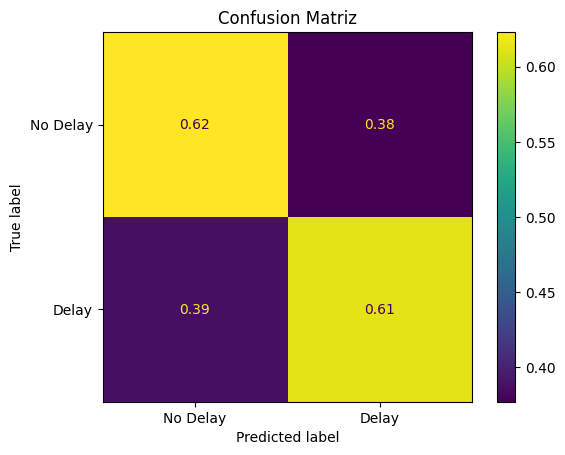


La gráfica muestra un desempeño bastante equilibrado entre los vuelos con **"delay"** y **"no delay"** logrando identficar **62%** de los vuelos sin retraso y un **61%** de vuelos con retraso. Sin embargo el modelo aun presenta dificultades para detectar correctamente un vuelo con y sin retraso teniendo un promedio de **38.5%** de error.

---

- **Curva ROC Logistic Regression**

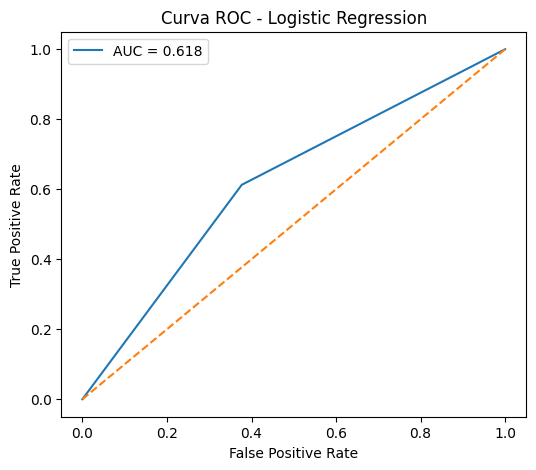


En cuanto a la curva AUC-ROC nuesto modelo presenta un **AUC de 0.61** lo que nos indica que el modelo tiene una capacidad moderada, para detectar los vuelos con y sin retraso.

---

#### **8.1.2. Random Forest**

- **Matriz de Confusion**

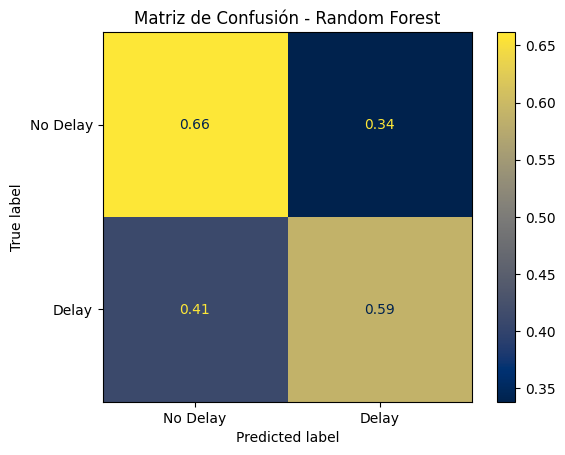


La gráfica de Random Forest el modelo tiende mayormente a solo predecir los vuelos con **no retraso** esto pasa un **66%** de la veces, y un **59%** de vuelos con retraso teniendo promedio de error de un **37.5%**

---

- **Curva ROC Random Forest**

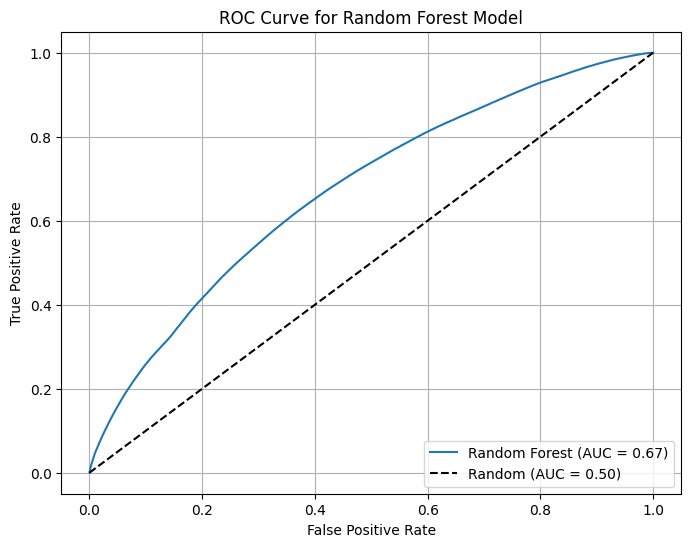


En nuestra curva AUC-ROC la curva de nuestro modelo presenta un **AUC de 0.67** esto nos indica que el modelo tiene una capacidad de discriminación moderada

---

#### **8.1.3. Gradient Boosting**

- **Matriz de confusion**

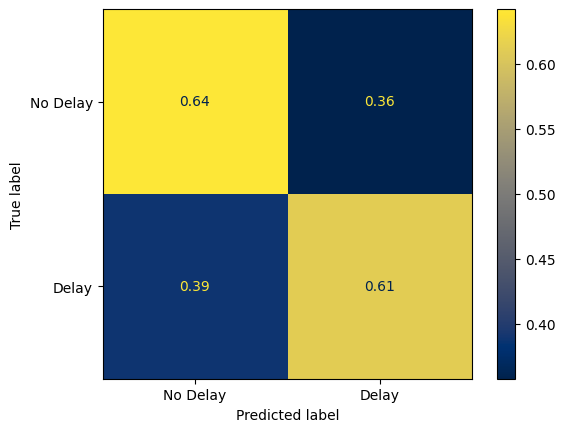

En nuestra gráfica matriz de confusión de gradient boosting muestra una relación un poco más equilibrada sin embargo cierto porcentaje sigue yendo a predecir los vuelos como no retraso con un **64%** y por parte de predecir retrasos con un **61%** sin embargo sigue presentado muchos poblemas al predecir un retraso real con un margen de error **33.5%**

---


- **Curva ROC Gradient Boost**

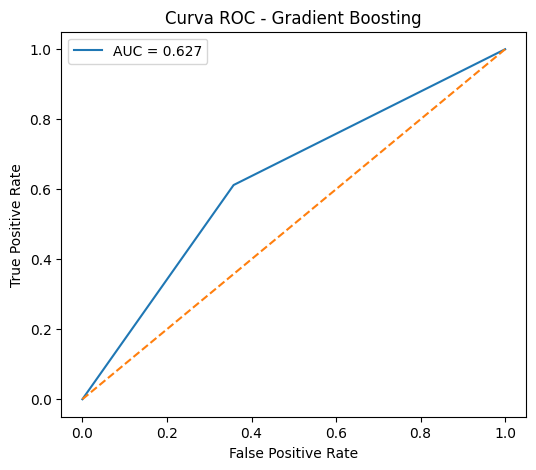

En nuestra curva AUC-ROC la curva de nuestro modelo en gradient boosting presenta un **AUC de 0.62** esto nos indica que el modelo tiene una capacidad de discriminación moderada

---

#### **8.1.4. XGBoost**

- **Matriz de confusion**

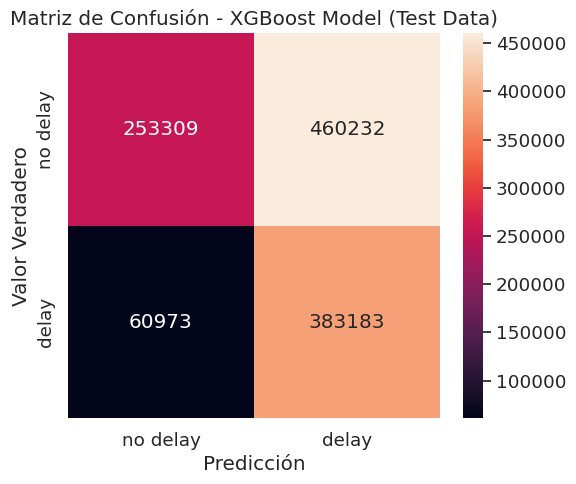

En esta gráfica de XGBoost, tenemos que el modelo logra predecir de manera correcta los vuelos con no delay un **22%** de las veces y que detecta los vuelos con retraso con **33.39%** de exactitud el modelo presenta un varios errores con un **22.5%** de las veces que hizo la predicción

---


- **Curva ROC XGBoost**

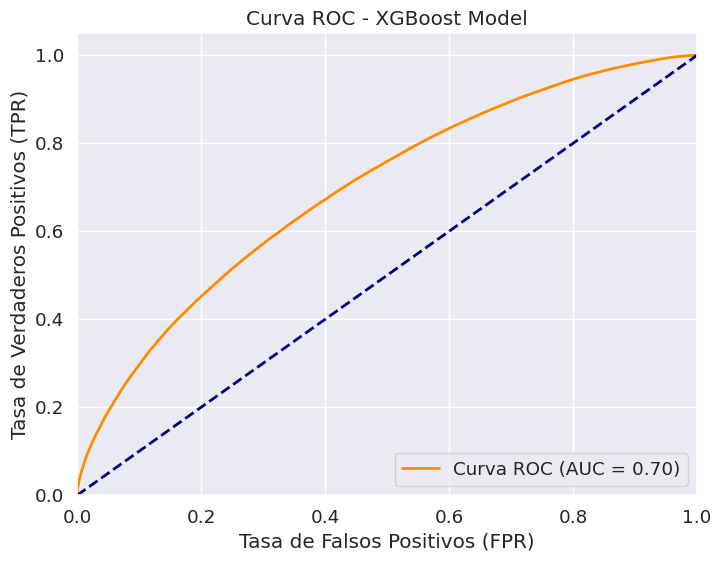

La curva ROC-AUC de nuestro model XGBboost presenta un **70%** lo que nos inidica que el modelo puede distinguir de **manera más precisa** la clase postiva y negativa


**Nota:**
Dentro del siguiente cuaderno se encuentra alojado el **entrenamiento de XGBoost**, de donde se obtuvieron nuestras gráficas e información relevante respecto a este modelo.

- 📄 [Notebook_Entrenamiento_XGBoost](https://colab.research.google.com/drive/1-gnhcyVkpqxYSn0Knn9vSrfFELcY-JXB?usp=drive_link)

---

#### **8.1.5. Catboost**

- **Matriz de confusion**

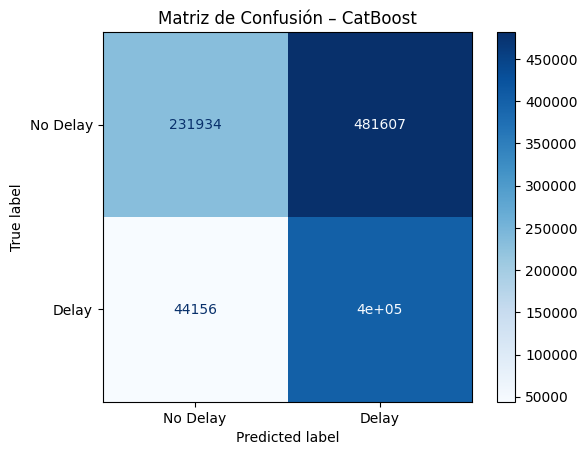

La gráfica de catboost, muestra que indetifica los sin retrasos un **20.21%** correctamente y los vuelos con retrasos un **34%** estan bien identificados, pero el modelo aun presenta errores con un promedio de **22%**

---


- **Curva ROC Catboost**

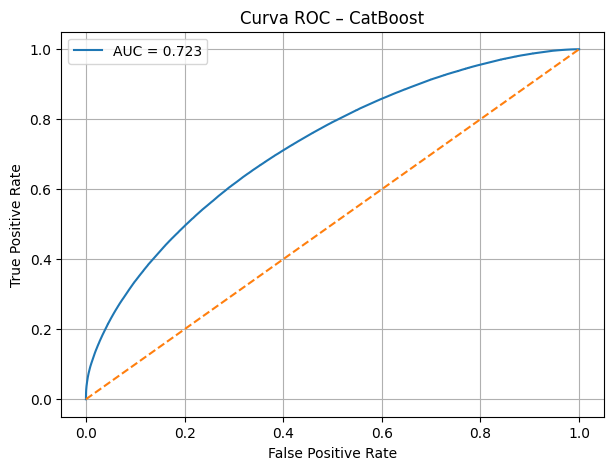

La curva AUC-ROC de Catboost muestra que tiene un **0.72** es decir un 72% de presición de distinguir las clases negativas y positivas.

**NOTA:** A continuación dejaremos el cuaderno utilizando durante el **entrenamiento de Catboost**, de este notebook se extrajeron las gráficas y las métricas importantes a evaluar.

- 📄 [Entrenamiento_Catboost](https://drive.google.com/file/d/1Zo5xxKnVgY65Rh6rzH7VO0YaxI4wiWmo/view?usp=drive_link)

---

### **8.2. Selección del modelo final**

#### **8.2.1. Comparación de modelos en una tabla con métricas necesarias**
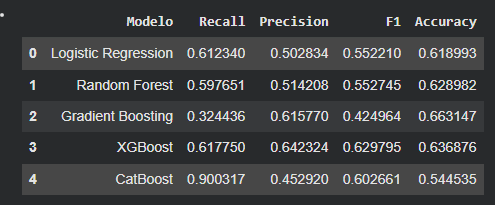



La siguiente tabla engloba los 5 modelos de machine learning,  con las siguientes métricas:
- Recall
- Presicion
- F1-Score
- Accuracy
---


#### **8.2.2. F1-Score**
Basandonos únicamente en la métrica mas importante F1-Score ya que esta métrica es el equilibrio, entre Recall y presición, el modelo que tiene un mayor porcentaje por si solo es el modelo **XGBoost** con un **0.62** siendo el mejor de los 5 modelos entrenados.

#### **8.2.3. Recall**
La segunda métrica mas importante para nuestro modelo es el recall, en esta categoría el modelo que presenta un mayor porcentaje de recall, es **Catboost** con un **0.90** Pero este modelo al tener un recall muy alto sacrifica demasiada presicion

#### **8.2.4. Accuracy**
La tercera métrica pero no por ello menos importante, accuracy, el modelo que presenta un mayor porcentaje es **Gradient Boosting** con un **0.66** pero este porcentaje es engañoso pues presenta un accuracy demasiado alto pero este modelo es el que menor recall presenta

#### **8.2.5 ¿Por qué elegimos Logistic Regression?**
Aunque Logistic Regression no es el modelo que destaque por tener métricas super altas, tiene un equilibrio de métricas bastante bueno, lo que nos hizo elegirlo como nuestro modelo final, pues si analizamos cada uno de los modelos entrenados tenemos que:

- **Gradient Boosting** falla demasaido en detectar un retraso real. También tiene el recall más bajo de los modelos, algo que tenemos claro es que un accuracy alto no es sinonimo de un buen modelo, por eso **este modelo no nos ayuda con el problema planteado**.

- **Random Forest** Si bien presenta métricas similares a logistic regression, es muchisimo más lento y es muy complejo de utilizar, además de de ser más costoso computacionalmente al requir más recursos para una predicción, por estas razones este modelo fue **descartado**.

- **CatBoost** Catboost es un poco más complejo pues este tipo de modelo acepta features categoricas de manera directa, por lo que implementarlo es muy complicado. Tener un recall demasiado alto y una presición demasiado baja produce un alto numero de falsos positivos siendo estoy muy malo para un modelo que quiere evitar precisamente eso por su baja confiabilidad este modelo fue **descartado para su uso operacional**

- **XGBoost** Este modelo es principalmente el mejor númericamente en cuanto a **F1-score**, **precision** y **Accuracy**, es demasiado complejo de applicar en un negocio real, este modelo tiene un mayor riesgo de tener sobreajustes, este modelo no es el ideal para un sistema explicable y que pueda mantenerse.

- **Logistic Regression** El modelo ganador, este presenta un buen equilibrio de métricas **recall**,**precision** y **F1-Score**, es el modelo que presenta los resultados más estables de los 5 modelos presentados para este proyecto porque:
  - Es fácil de interpretar por lo que es bastante bueno para operaciones reales.
  - Tiene un bajo consumo de recursos computacionales.
  - Fácil Analisis del impacto de las variables
  - Es ideal como Baseline Productivo

Logistic regression tiene mejor rendimiento, explicabilidad y por su puesto su simplicidad hace que este modelo sea **el mejor** de los 5 modelos presentados.

---

## **9. Como interpreta el modelo**

### **9.1 ¿Qué realemente interpreta el modelo?**
Durante todo el proyecto se organizarón todas las variables, pudimos observar que las variables que tenian un peso mayor para el modelo de machine learning eran:

- **La hora:** Dado que el horario es importante para las aerolineas en dado caso exista un retraso tiende a haber una reacción en cadena.
- **El día de de la semana:**  Se obeservó que los días Jueves, Lunes y Viernes presentarón mayor retraso

Estas variables son determinantes para poder predecir correctamente un retraso y nos ayuda de sobremanera a determinar una predicción

---

## **10. Limitaciones del proyecto**
Nuestro modelo tiene restricciones que deben ser consideradas antes de su implemtación operativa:

- El modelo depende de datos históricos
- No se incluyeron variables climáticas
- No se consideraron eventos externos



### **10.1. El modelo depende de datos históricos**
Nuestro modelo se basa puramente en datos historicos, por lo que su capacidad de adaparse a cambios demasiado grandes y bruscos se ve limitado.

### **10.2. No se incluyeron Variables Climáticas**
Variables meteorológicas clave como puden ser la precipitación, vientos fuertes, o la visibilidad no fueron incluidas durante este entrenamiento, lo que reduce de una gran manera la presición de nuestro modelo.

### **10.3. No se consideraon eventos externos**
Durante el desarrollo del proyecto no se consideraron variables externas, huelgas, cierres aeroportuarios, crisis de conectividad aerea, cambios repentinos, que pueden afectar de manera significativa la puntualidad de un vuelo.

---

## **11.Futuras mejoras**

Pensando en que nuestro modelo aún le queda un camino largo que recorrer. Queda mucho por mejorar e implemntar y los cambios futuros que nos gustaria hacer es:

- **Integrar datos climaticos**
- **Optimizar los hiperparámetros utilizados**
- **Aprendizaje profundo de machine learning**
- **Un despliegue real dentro de app**

---

## **12. Conclusiones**


### **12.1. Lo que logramos**
Durante el proceso de modelado y desarrollo de nuestro servicio logramos demostrar que es posible predecir retrasos con un nivel aceptable de presición, utilizando unicamente información previa al vuelo.

### **12.2. La selección de variables**
Las variables utilizadas demostraron aportar información relevante, ya que aquellas relacionadas con el tiempo y la operación del vuelo presentaron mayor impacto en la predicción del retraso.

### **12.3. Priorizar recall**
Nuestro objetivo como cientificos de datos es dar soluciones, por ello sabemos que no detectar un vuelo que con retraso genera costos y pérdidas, le dimos un mayor capacidad al modelo para identificar correctamente la clase postivia.
### **12.4. El modelo seleccionado ofrece un buen balance**
El modelo final presento resultados consistentes en los datos de prueba, por ello confiamos su entrenamiento para casos reales.



---

En conclusión, el proyecto permitió desarrollar un modelo de Machine Learning medianamente confiable, aplicando de manera práctica los conocimientos adquiridos durante los cursos de data-science de **Alura LATAM**. Por medio de proceso bien estructurado de análisis de datos, modelado y evaluación del los modelos. Tomamos  decisiones basadas en criterios esenciales que nos llevaron a la selección del modelo final (Regresion logistica). El modelo entrenado presenta una alineación con los objetivos del problema presentado en el hackaton de **NoCountry**. Nuetro modelo presenta un potencial moderado para su uso en escenarios reales.

**Muchas gracias**

**Seguiremos trabajando en mejorar**